# 정적 웹크롤링 과정
1. 원하는 웹페이지의 html 문서를 다 긁어온다
2. html 문서를 파싱한다
3. 파싱한 html문서에서 원하는 것을 골라서 사용한다

### get html documents => requests

In [1]:
!pip install requests

     ---------------------------------------- 0.0/62.5 kB ? eta -:--:--
     ------------------------------- ------ 51.2/62.5 kB 890.4 kB/s eta 0:00:01
     -------------------------------------- 62.5/62.5 kB 842.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/123.2 kB ? eta -:--:--
     ----------------------------- --------- 92.2/123.2 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 123.2/123.2 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/96.4 kB ? eta -:--:--
     ---------------------------------------- 96.4/96.4 kB 5.4 MB/s eta 0:00:00
  Using cached idna-3.4-py3-none-any.whl (61 kB)


In [3]:
import requests

url = "https://www.naver.com"

response = requests.get(url)

html_text = response.text

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
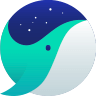
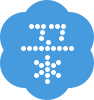

In [4]:
html_text

### parsing process => BeautifulSoup4

In [5]:
!pip install beautifulsoup4

     ---------------------------------------- 0.0/143.0 kB ? eta -:--:--
     -------------------------------------- 143.0/143.0 kB 4.1 MB/s eta 0:00:00


In [6]:
from bs4 import BeautifulSoup as bs

html = bs(html_text, 'html.parser')


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
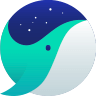
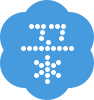

In [8]:
html

### export component => BeautifulSoup4

#### find, findall (tag or attr)

In [10]:
html.find('p')

<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>

In [13]:
html.find(class_='logo_area')

<div class="logo_area">
<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>
</div>

In [14]:
html.find(attrs={'class': 'logo_area'})

<div class="logo_area">
<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>
</div>

In [15]:
html.find(id='header')

<div id="header" role="banner">
<div class="special_bg">
<div class="group_flex">
<div class="logo_area">
<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>
</div>
<div class="service_area">
<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
<i class="sa_bar"></i>
<a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>
<a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>
</div>
<div class="search_area" data-clk-prefix="sch" id="search">
<form action="https://search.naver.com/search.naver" id="sform" method="get" name="sform" role="search">
<fieldset>
<legend class="blind">검색</legend>
<input name="where" type="hidden" value="nexearch"/>
<input id="sm" name="

In [16]:
html.find(attrs={'id': 'header'})

<div id="header" role="banner">
<div class="special_bg">
<div class="group_flex">
<div class="logo_area">
<h1 class="logo_default">
<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>
</h1>
</div>
<div class="service_area">
<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>
<i class="sa_bar"></i>
<a class="link_jrnaver" data-clk="top.jrnaver" href="https://jr.naver.com"><i class="ico_jrnaver"></i><span class="blind">쥬니어네이버</span></a>
<a class="link_happybin" data-clk="top.happybean" href="https://happybean.naver.com"><i class="ico_happybin"></i><span class="blind">해피빈</span></a>
</div>
<div class="search_area" data-clk-prefix="sch" id="search">
<form action="https://search.naver.com/search.naver" id="sform" method="get" name="sform" role="search">
<fieldset>
<legend class="blind">검색</legend>
<input name="where" type="hidden" value="nexearch"/>
<input id="sm" name="

In [18]:
html.find('a', class_='logo_naver')

<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>

In [20]:
html.find('a', attrs={'class': 'logo_naver'})

<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>

#### select, select_one => css selector

In [22]:
html.select_one('a.logo_naver')

<a class="logo_naver" data-clk="top.logo" href="/"><span class="blind">네이버</span></a>

### get text, hyperlink, image

In [1]:
from bs4 import BeautifulSoup as bs
import requests

query = '추석'

url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+'%s'%query

response = requests.get(url)
html_text = response.text

soup = bs(response.text, 'html.parser')

In [3]:
news_titles = soup.select("a.news_tit")
for i in news_titles:
    title = i.get_text()
    print(title)

부안 행안서 올해 첫 모내기…추석 전인 9월 상순께 수확 가능
'청량~옥동' 추석 전 완전 개통..간선도로망 '속도'
천안시, 올해 첫 모내기…삼광벼, 9월 추석 전후 수확
"추석전 햅쌀 출하한다"…군산지역 14.9㏊서 모내기
5월 끝으로 추석 전까지 공휴일 딱 '2번' 밖에 없다
추석 연휴 이웃 모녀 살해한 50대 무기징역 선고
밀양시, 올해 첫 모내기…추석 전 햅쌀 조기 출하 목표
김종인 “30석 이상도 가능”...추석전 제3지대 깃발 꽂을까
김종인 “추석 전 신당 창당해야 총선 치러”
추석에 모녀 살해한 50대 무기징역, 법원 “사회로부터 격리해야”


In [5]:
for i in news_titles:
    href = i.attrs['href']
    print(href)

https://www.pressian.com/pages/articles/2023050912473945819?utm_source=naver&utm_medium=search
http://web.ubc.co.kr/wp/archives/107269
https://www.yna.co.kr/view/AKR20230502046700063?input=1195m
http://www.newsis.com/view/?id=NISX20230502_0002287907&cID=10808&pID=10800
https://www.insight.co.kr/news/437599
https://news.kbs.co.kr/news/view.do?ncd=7663336&ref=A
https://www.cnbnews.com/news/article.html?no=599673
https://www.mk.co.kr/article/10722069
http://www.ikbc.co.kr/article/view/kbc202304260029
https://biz.chosun.com/topics/law_firm/2023/04/28/FEPF5KFSGNBB3CA2ZUIJCYGIKM/?utm_source=naver&utm_medium=original&utm_campaign=biz


In [7]:
news_thumbnail = soup.select("img.thumb.api_get")
link_thumbnail = []

for img in news_thumbnail:
    link_thumbnail.append(img.attrs['src'])

import os

path_folder = './img_download/'
if not os.path.isdir(path_folder):
    os.mkdir(path_folder)

from urllib.request import urlretrieve

i = 0

for link in link_thumbnail:
    i += 1
    urlretrieve(link, path_folder + f'{i}.jpg')